In [ ]:
# EDA for presentation

In [1]:
# import packages
import numpy as np

# data manipulation
import pandas as pd 

# visualization
!pip install plotly
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline

In [2]:
train_features = pd.read_csv("train_features.csv")
target_scored = pd.read_csv("train_targets_scored.csv")

/Users/jaeyoungkang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/jaeyoungkang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



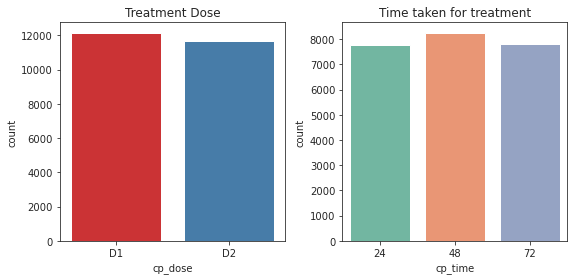

In [3]:
# Analyzing training dataset

fig = plt.figure(figsize=(12, 4))
grid_space = fig.add_gridspec(1, 3)

with sns.axes_style("ticks"):
    ax = fig.add_subplot(grid_space[0, 0])
    sns.countplot(train_features['cp_dose'], palette="Set1")
    plt.title("Treatment Dose")

with sns.axes_style("ticks"):
    ax = fig.add_subplot(grid_space[0, 1])
    sns.countplot(train_features['cp_time'], palette="Set2")
    plt.title("Time taken for treatment")

fig.tight_layout()

# Points to note:

#Treatment dose has two categories D1 (high) and D2 (low)
# There are three categories for treatment duration- 24, 48 and 72


/Users/jaeyoungkang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



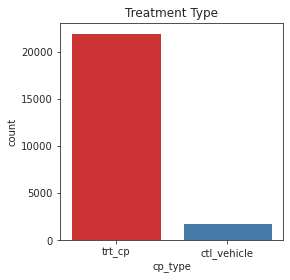

In [4]:
fig = plt.figure(figsize=(4, 4))
grid_space = fig.add_gridspec(1, 3)

with sns.axes_style("ticks"):
    sns.countplot(train_features['cp_type'], palette="Set1")
    plt.title("Treatment Type")
    
# The vast majority of treatments are compund treatments (“trt_cp”), compared to that of control treatements (“ctl_vehicle”).
#Controls have no MoAs.

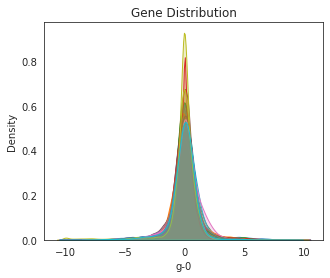

In [5]:
# Gene expression distribution

fig = plt.figure(figsize=(5, 4))

with sns.axes_style("white"):
    for i in range(0,30):
        sns.kdeplot(train_features.loc[:,f"g-{i}"], shade=True);
        plt.title("Gene Distribution")

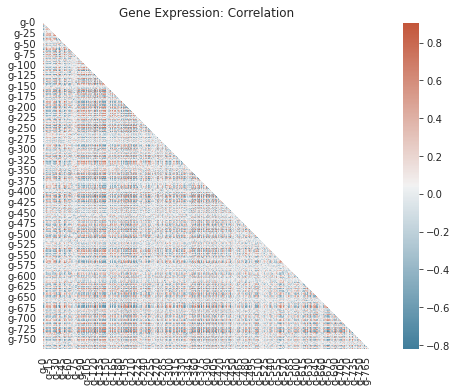

In [6]:
# Gene expression correlation - does not make sense too many items

f = plt.figure(figsize=(12, 6))

mask = np.triu(np.ones_like(train_features.loc[:,"g-0":"g-771"].corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

with sns.axes_style("white"):
    sns.heatmap(train_features.loc[:,"g-0":"g-771"].corr(), mask=mask, square=True, cmap=cmap);
    plt.title("Gene Expression: Correlation")

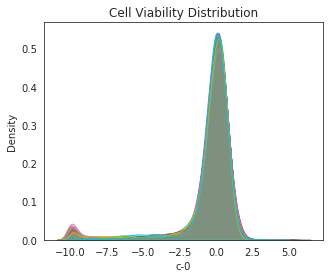

In [7]:
# Cell viability distribution

fig = plt.figure(figsize=(5, 4))
with sns.axes_style("white"):
    for i in range(0,30):
        sns.kdeplot(train_features.loc[:,f"c-{i}"], shade=True);
        plt.title("Cell Viability Distribution")

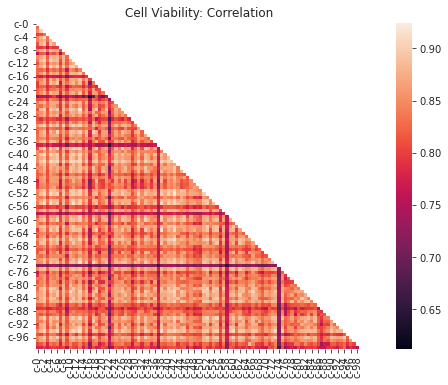

In [8]:
#Cell viability correlation

fig = plt.figure(figsize=(12, 6))

mask = np.triu(np.ones_like(train_features.loc[:,"c-0":"c-99"].corr()))

with sns.axes_style("ticks"):
    sns.heatmap(train_features.loc[:,"c-0":"c-99"].corr(), mask=mask, square=True);
    plt.title("Cell Viability: Correlation")
    
# Looks like there is correlation between cell  viability metrics

count    206.000000
mean      81.766990
std      115.160351
min        1.000000
25%       19.000000
50%       38.500000
75%       83.000000
max      832.000000
dtype: float64

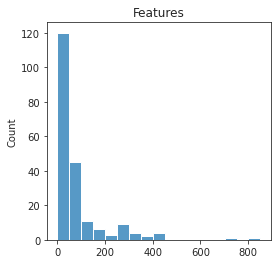

In [9]:
features = target_scored.drop(['sig_id'], axis=1).sum().sort_values(inplace=False, ascending=False)
features = pd.Series(features)

fig = plt.figure(figsize=(4, 4))
grid_space = fig.add_gridspec(1, 3)

with sns.axes_style("ticks"):
    sns.histplot(data=features, stat='count', binwidth= 50)
    plt.title("Features")

features.describe()

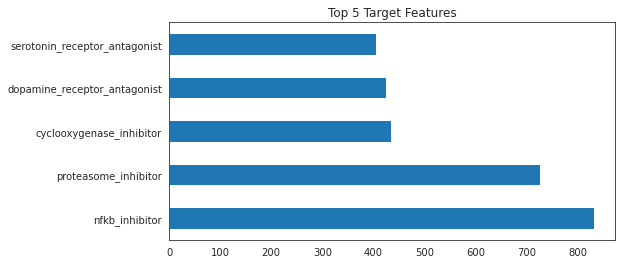

In [10]:
# Top 5 occurances
features = target_scored.drop(['sig_id'], axis=1).sum().sort_values(inplace=False, ascending=False)
features = pd.Series(features)
with sns.axes_style("white"):
    features[:5].plot(kind='barh', figsize=(8,4), title='Top 5 Target Features')
    
# 206 target variables these are the top 20 target variables
# Top occurances# We can see nfkb_inhibitor has the highest occurence followed by proteasome_inhibitor

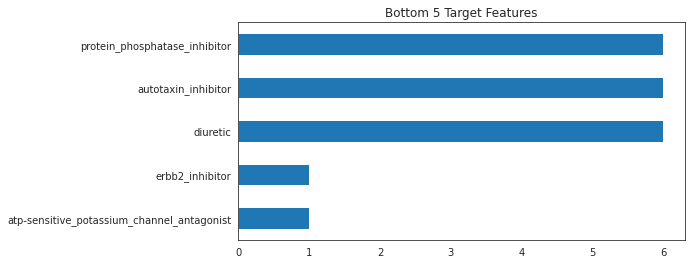

In [11]:
# Bottom 5 occurences
features = target_scored.drop(['sig_id'], axis=1).sum().sort_values(inplace=False,ascending=True)
features = pd.Series(features)
with sns.axes_style("white"):
    features[:5].plot(kind='barh', figsize=(8 , 4), title='Bottom 5 Target Features')

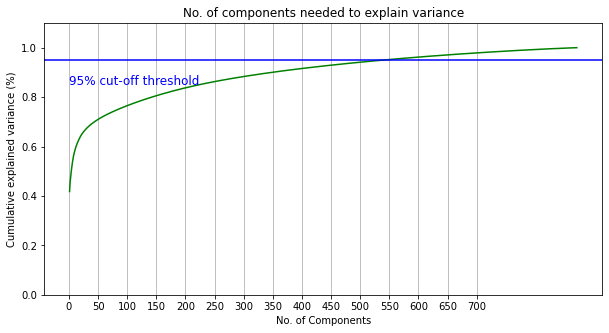

In [12]:
#PCA

from sklearn.decomposition import PCA

GENES = [col for col in train_features.columns if col.startswith('g-')]
CELLS = [col for col in train_features.columns if col.startswith('c-')]

data = pd.concat([pd.DataFrame(train_features[GENES]), pd.DataFrame(train_features[CELLS])], axis=1)

pca = PCA().fit(data)
plt.rcParams["figure.figsize"] = (10,5)

fig, ax = plt.subplots()
xx = np.arange(1, 873, step=1)
yy = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xx, yy, ls='-', color='g')

plt.xlabel('No. of Components')
plt.xticks(np.arange(0, 750, step=50)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative explained variance (%)')
plt.title('No. of components needed to explain variance')

plt.axhline(y=0.95, color='b', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'blue', fontsize=12)

ax.grid(axis='x')
plt.show()

In [ ]:
#Analysis

In [13]:
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("/Users/jaeyoungkang/Documents/train_features.csv")
df_y = pd.read_csv("/Users/jaeyoungkang/Documents/train_targets_scored.csv")

In [14]:
df_y = df_y.drop(["sig_id"], axis = 1)
df_initial = pd.concat([df,df_y], axis = 1)

In [15]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_initial, test_size=0.2, random_state = 1)

train = train.drop(["sig_id","cp_type", "cp_dose"], axis = 1)
test = test.drop(["sig_id","cp_type", "cp_dose"], axis = 1)

In [16]:
trainy = train.iloc[:,-206:]
testy = test.iloc[:,-206:]

train = train.iloc[:,:-206]
test = test.iloc[:,:-206]

In [17]:
!pip install scikit-multilearn
from skmultilearn.problem_transform import BinaryRelevance, ClassifierChain
from sklearn.linear_model import LogisticRegression

logistic_classifier = BinaryRelevance(LogisticRegression())

logmodel = logistic_classifier.fit(train, trainy)

/Users/jaeyoungkang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/jaeyoungkang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Use

/Users/jaeyoungkang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/jaeyoungkang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Use

/Users/jaeyoungkang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/jaeyoungkang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Use

/Users/jaeyoungkang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/jaeyoungkang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Use

/Users/jaeyoungkang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/jaeyoungkang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Use

/Users/jaeyoungkang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/jaeyoungkang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Use

/Users/jaeyoungkang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/jaeyoungkang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Use

/Users/jaeyoungkang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/jaeyoungkang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Use

/Users/jaeyoungkang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/jaeyoungkang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Use

/Users/jaeyoungkang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/jaeyoungkang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Use

/Users/jaeyoungkang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/jaeyoungkang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Use

/Users/jaeyoungkang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/jaeyoungkang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Use

In [18]:
logpredictions = logmodel.predict(test)

In [19]:
from sklearn.metrics import accuracy_score, hamming_loss, f1_score

accuracy_score(testy, logpredictions)

0.39596892714675624

In [20]:
hamming_loss(testy, logpredictions)

0.004293818247045898

In [21]:
f1_score(testy, logpredictions, average = 'weighted')

/Users/jaeyoungkang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1495: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.



0.2603523348594797

In [22]:
logprobpredictions = logmodel.predict_proba(test)

logprobdf = pd.DataFrame.sparse.from_spmatrix(logprobpredictions)

In [24]:
from sklearn.metrics import log_loss

logistic_losslist = []

for i in range(0,205):
    logistic_losslist.append(log_loss(testy.iloc[:,i].to_numpy(), logprobdf[i].to_numpy(), labels = [0,1]))
    
sum(logistic_losslist)/len(logistic_losslist)

0.03033406061843513

In [25]:
from sklearn.naive_bayes import GaussianNB 

gaussian_bayesclassifier = BinaryRelevance(GaussianNB())

gaussianmodel = gaussian_bayesclassifier.fit(train, trainy)

In [26]:
gaussianpredictions = gaussianmodel.predict(test)

In [27]:
accuracy_score(testy, gaussianpredictions)

0.002939323955490237

In [28]:
hamming_loss(testy, gaussianpredictions)

0.49092927073375064

In [29]:
f1_score(testy, gaussianpredictions, average = 'weighted')

/Users/jaeyoungkang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1495: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.



0.08997686441659318

In [30]:
gaussianprobpredictions = gaussianmodel.predict_proba(test)

gaussianprobdf = pd.DataFrame.sparse.from_spmatrix(gaussianprobpredictions)

In [31]:
gaussian_losslist = []

for i in range(0,205):
    gaussian_losslist.append(log_loss(testy.iloc[:,i].to_numpy(), gaussianprobdf[i].to_numpy(), labels = [0,1]))

sum(gaussian_losslist)/len(gaussian_losslist)

16.05870239276432

In [32]:
from sklearn.ensemble import RandomForestClassifier

trainylist = trainy.values.tolist()

rf_classifier = RandomForestClassifier(n_estimators = 100, max_depth=10, random_state=0)

rfmodel = rf_classifier.fit(train,trainylist)

In [33]:
rfpredictions = rfmodel.predict(test)

In [34]:
testylist = testy.values.tolist()

accuracy_score(testylist, rfpredictions)

0.44677724123451606

In [35]:
hamming_loss(testylist, rfpredictions)

0.0030055708546257664

In [36]:
f1_score(testylist, rfpredictions, average = 'weighted')

/Users/jaeyoungkang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1495: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.



0.1284656535514438

In [37]:
rfprobpredictions = rfmodel.predict_proba(test)

In [55]:
import numpy as np
rf_probpredictions = np.array(rfprobpredictions)

In [56]:
rfprobdf = pd.DataFrame(rf_probpredictions.tolist())

rfprobdf = rfprobdf.T

In [57]:
rf_probdf = rfprobdf.sum(axis = 1)
rf_probdf = pd.DataFrame(rf_probdf)

In [59]:
rf_probdf_ = pd.DataFrame(rf_probdf[0].values.tolist(), index = rf_probdf.index)

rf_probdf_ = rf_probdf_.loc[:, 1::2]

In [61]:
rf_prob_ = rf_probdf_.to_numpy()

rf_probdf_ = pd.DataFrame(rf_prob_)

In [63]:
rf_losslist = []

for i in range(0,205):
    rf_losslist.append(log_loss(testy.iloc[:,i].to_numpy(), rf_probdf_[i].to_numpy(), labels = [0,1]))
    
sum(rf_losslist)/len(rf_losslist)

0.017063129575492823

In [71]:
from sklearn.neural_network import MLPClassifier

neuralclf_try_100 = MLPClassifier(random_state = 1, max_iter = 100)

neuralmodel_try_100 = neuralclf_try_100.fit(train,trainylist)

/Users/jaeyoungkang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.



In [72]:
neuraltry100predictions = neuralmodel_try_100.predict(test)

In [73]:
accuracy_score(testylist, neuraltry100predictions)

0.3917698929246273

In [74]:
hamming_loss(testylist, neuraltry100predictions)

0.0042581468398190745

In [75]:
f1_score(testylist, neuraltry100predictions, average = 'weighted')

/Users/jaeyoungkang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1495: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.



0.2599557420122129

In [79]:
neuralclf_try_200 = MLPClassifier(random_state = 1, hidden_layer_sizes = (200,), max_iter = 100)

neuralmodel_try_200 = neuralclf_try_200.fit(train,trainylist)

/Users/jaeyoungkang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.



In [80]:
neuraltry200predictions = neuralmodel_try_200.predict(test)

In [81]:
accuracy_score(testylist, neuraltry200predictions)

0.4455175309678774

In [83]:
hamming_loss(testylist, neuraltry200predictions)

0.003422416727647787

In [84]:
f1_score(testylist, neuraltry200predictions, average = 'weighted')

/Users/jaeyoungkang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1495: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.



0.2686549350758742

In [85]:
neuralclf_try_300 = MLPClassifier(random_state = 1, hidden_layer_sizes = (300,), max_iter = 100)

neuralmodel_try_300 = neuralclf_try_300.fit(train,trainylist)

/Users/jaeyoungkang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.



In [86]:
neuraltry300predictions = neuralmodel_try_300.predict(test)

In [87]:
accuracy_score(testylist, neuraltry300predictions)

0.4646231366785639

In [88]:
hamming_loss(testylist, neuraltry300predictions)

0.003126853639196965

In [89]:
f1_score(testylist, neuraltry300predictions, average = 'weighted')

/Users/jaeyoungkang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1495: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.



0.273052897891839

In [90]:
neuralclf_try_400 = MLPClassifier(random_state = 1, hidden_layer_sizes = (400,), max_iter = 100)

neuralmodel_try_400 = neuralclf_try_400.fit(train,trainylist)

In [91]:
neuraltry400predictions = neuralmodel_try_400.predict(test)

In [92]:
accuracy_score(testylist, neuraltry400predictions)

0.47994961158933447

In [93]:
hamming_loss(testylist, neuraltry400predictions)

0.0029882447425441665

In [94]:
f1_score(testylist, neuraltry400predictions, average = 'weighted')

/Users/jaeyoungkang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1495: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.



0.26730174977356175

In [95]:
neuralclf_try_500 = MLPClassifier(random_state = 1, hidden_layer_sizes = (500,), max_iter = 100)

neuralmodel_try_500 = neuralclf_try_500.fit(train,trainylist)

In [96]:
neuraltry500predictions = neuralmodel_try_500.predict(test)

In [97]:
accuracy_score(testylist, neuraltry500predictions)

0.48309888725593114

In [98]:
hamming_loss(testylist, neuraltry500predictions)

0.0029118060127724023

In [99]:
f1_score(testylist, neuraltry500predictions, average = 'weighted')

/Users/jaeyoungkang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1495: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.



0.2703247788183369

In [100]:
neuralclf_try_1000 = MLPClassifier(random_state = 1, hidden_layer_sizes = (1000,), max_iter = 100)

neuralmodel_try_1000 = neuralclf_try_1000.fit(train,trainylist)

In [101]:
neuraltry1000predictions = neuralmodel_try_1000.predict(test)

In [102]:
accuracy_score(testylist, neuraltry1000predictions)

0.4982154104555952

In [103]:
hamming_loss(testylist, neuraltry1000predictions)

0.0027538326379107562

In [104]:
f1_score(testylist, neuraltry1000predictions, average = 'weighted')

/Users/jaeyoungkang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1495: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.



0.2752882805306759

In [105]:
neuraltry1000probpredictions = neuralmodel_try_1000.predict_proba(test)

In [106]:
neuralprobdf = pd.DataFrame(neuraltry1000probpredictions)

neural_1000_losslist = []

for i in range(0,205):
    neural_1000_losslist.append(log_loss(testy.iloc[:,i].to_numpy(), neuralprobdf[i].to_numpy(), labels = [0,1]))

sum(neural_1000_losslist)/len(neural_1000_losslist)

0.04093509990610814